In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sklearn
%matplotlib inline

## 练习1,2

为了方便测试，对knn2的代码作了修改

In [2]:
import knn2

In [3]:
error_rate_l1 = []
error_rate_l2 = []
for k in range(1, 21):
    error_rate_l1.append(knn2.datingClassTest(k,'l1'))
    error_rate_l2.append(knn2.datingClassTest(k,'l2'))

使用不同的k值和使用L1和L2距离对错误率的影响如下图

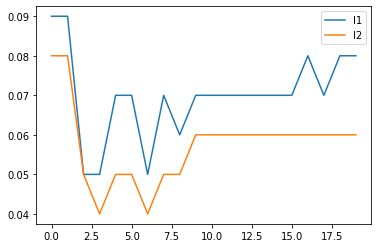

In [4]:
plt.plot(error_rate_l1, label='l1')
plt.plot(error_rate_l2, label='l2')
plt.legend()

结论：
- 过小或过大的k值都会影响预测的结果
- 使用L2距离的准确率要高于使用L1距离

## 练习3

In [5]:
sizes = []
error_rate = []
for i in range(1,21):
    size = i / 20
    sizes.append(size)
    error_rate.append(knn2.datingClassTest(6,'l2', size))

不同样本数目对错误率的影响如下图

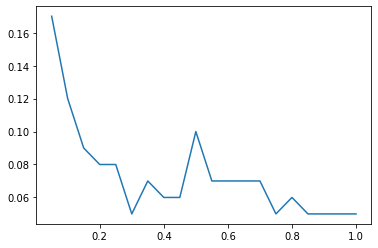

In [6]:
plt.plot(sizes, error_rate)

结论：
- 总体来说，样本数目越多，准确率越高

## 练习5

### 约会网站

In [7]:
datingDataMat, datingLabels = knn2.file2matrix('datingTestSet2.txt')
normMat, ranges, minVals = knn2.autoNorm(datingDataMat)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(normMat, datingLabels, 
                                                   test_size=0.1, random_state=42)
knnClassifier = KNeighborsClassifier(n_neighbors=3)
knnClassifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [9]:
knnClassifier.score(x_test, y_test)

0.92

#### +PCA

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1, random_state=42)
pcadata = pca.fit_transform(normMat)

x_train, x_test, y_train, y_test = train_test_split(pcadata, datingLabels, 
                                                   test_size=0.1, random_state=42)
knnClassifier = KNeighborsClassifier(n_neighbors=3)
knnClassifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [11]:
knnClassifier.score(x_test, y_test)

0.34

使用不同的`n_components`值对比如下

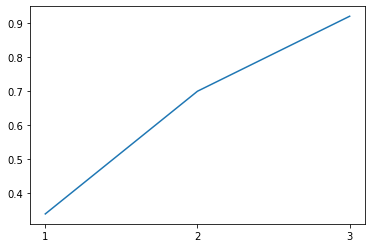

In [12]:
scores=[]
for i in range(1, 4):
    pca = PCA(n_components=i, random_state=42)
    pcadata = pca.fit_transform(normMat)
    
    
    x_train, x_test, y_train, y_test = train_test_split(pcadata, datingLabels, 
                                                   test_size=0.1, random_state=42)
    knnClassifier = KNeighborsClassifier(n_neighbors=3)
    knnClassifier.fit(x_train, y_train)
    scores.append(knnClassifier.score(x_test, y_test))
plt.xticks([1,2,3])
plt.plot(range(1, 4), scores)

### 手写体识别

为了方便编程，knn3.py中的createDataSet函数是被改写了的

In [13]:
import knn3

x_train, y_train = knn3.createDataSet('./trainingDigits/')
x_test, y_test = knn3.createDataSet('./testDigits/')

In [14]:
knnClassifier = KNeighborsClassifier(n_neighbors=5)
knnClassifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [15]:
knnClassifier.score(x_test, y_test)

0.9809725158562368

#### +PCA

In [16]:
pca = PCA(n_components=50, random_state=42)
x_train_pca = pca.fit_transform(x_train)

knnClassifier = KNeighborsClassifier(n_neighbors=5)
knnClassifier.fit(x_train_pca, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [17]:
x_test_pca = pca.transform(x_test)
knnClassifier.score(x_test_pca, y_test)

0.9841437632135307

使用不同的`n_components`值对比如下

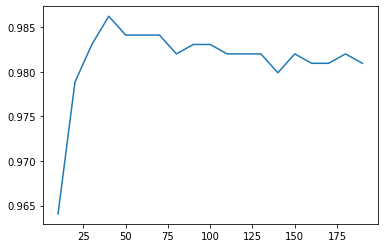

In [18]:
scores=[]
for i in range(10, 200, 10):
    pca = PCA(n_components=i, random_state=42)
    x_train_pca = pca.fit_transform(x_train)

    knnClassifier = KNeighborsClassifier(n_neighbors=5)
    knnClassifier.fit(x_train_pca, y_train)
    x_test_pca = pca.transform(x_test)
    scores.append(knnClassifier.score(x_test_pca, y_test))
plt.plot(range(10,200,10), scores)

结论：
使用PCA可以将多维的数据进行降维，但在维数不多的数据（如约会网站的数据）中，使用PCA会使得原本不多的数据变得更加稀少，使得预测的准确率下降，而在维数较多的手写体识别数据中，使用PCA可以在显著减少数据维数的同时，保持预测的准确率。